# Cross-Country Comparison between Benin, Sierra Leone and Togo

Importing Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import kruskal
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Loading dataset

In [2]:
benin = pd.read_csv('/Users/elbethelzewdie/Documents/solar-challenge-week0/solar-challenge-week0/data/benin_data_cleaned.csv')
sierra = pd.read_csv('/Users/elbethelzewdie/Documents/solar-challenge-week0/solar-challenge-week0/data/sierra-leone_data_cleaned.csv')
togo = pd.read_csv('/Users/elbethelzewdie/Documents/solar-challenge-week0/solar-challenge-week0/data/togo_data_cleaned.csv')

# Add country column for identification
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all
df_all = pd.concat([benin, sierra, togo], ignore_index=True)
df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 06:54,16.7,0.0,16.5,16.1,16.3,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.2,23.7,Benin
1,2021-08-09 06:55,18.2,0.1,18.0,17.4,17.6,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.8,Benin
2,2021-08-09 06:56,19.7,0.3,19.5,18.7,18.9,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.9,Benin
3,2021-08-09 06:57,21.1,0.6,20.9,19.9,20.1,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.4,23.9,Benin
4,2021-08-09 06:58,22.5,1.1,22.2,21.1,21.3,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.5,24.0,Benin


Metric Comparison


Boxplots

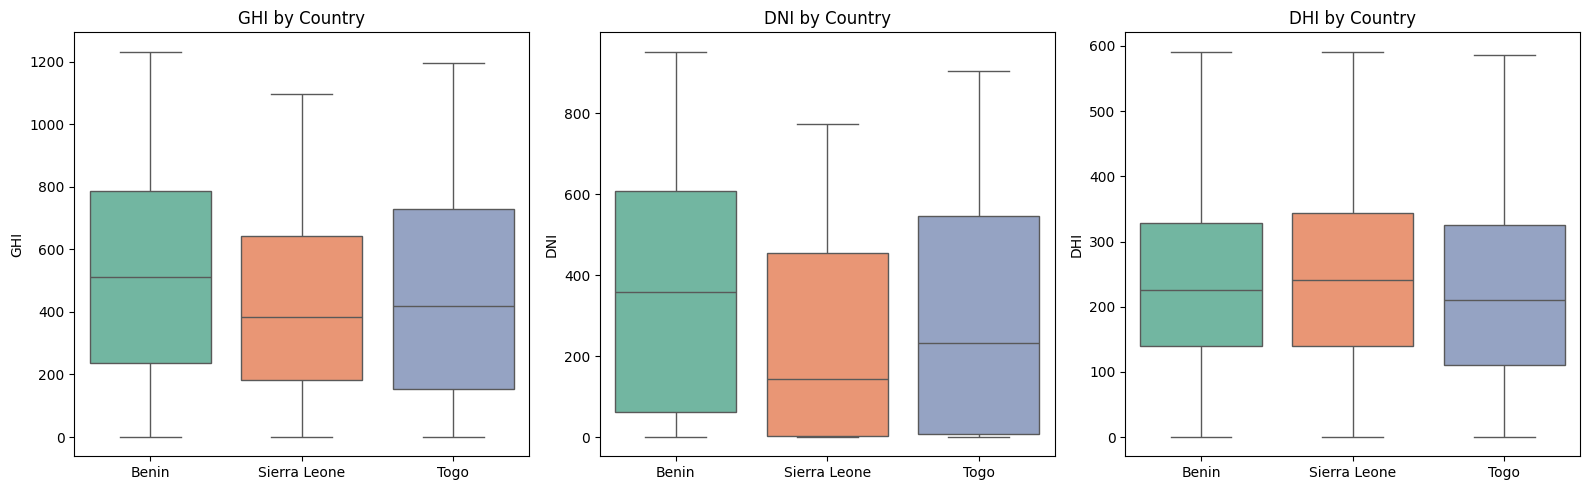

In [5]:
plt.figure(figsize=(16, 5))

for i, col in enumerate(['GHI', 'DNI', 'DHI']):
    plt.subplot(1, 3, i + 1)
    
    # Updated: include hue='Country' and legend=False to avoid warning
    sns.boxplot(x='Country', y=col, hue='Country', data=df_all, palette='Set2', legend=False)
    
    plt.title(f'{col} by Country')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Summary Table

In [6]:
summary = (
    df_all.groupby('Country')[['GHI', 'DNI', 'DHI']]
    .agg(['mean', 'median', 'std'])
    .round(2)
)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         508.39  510.6  304.16  358.81  359.3  280.16  241.52  225.2   
Sierra Leone  419.71  383.1  276.79  235.84  143.5  245.43  246.10  240.8   
Togo          446.10  418.1  316.09  293.34  231.6  281.02  223.55  209.6   

                      
                 std  
Country               
Benin         136.28  
Sierra Leone  136.34  
Togo          144.16

Statistical Testing

In [7]:
f_stat, p_val = f_oneway(
    df_all[df_all['Country'] == 'Benin']['GHI'],
    df_all[df_all['Country'] == 'Sierra Leone']['GHI'],
    df_all[df_all['Country'] == 'Togo']['GHI']
)

print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.5f}")

ANOVA F-statistic: 5426.055, p-value: 0.00000


A p-value < 0.001 indicates that the observed differences in GHI between countries are statistically significant.

## 🌞 Key Observations 

- Benin demonstrates the highest average GHI and DNI, indicating exceptional potential for both photovoltaic (PV) and concentrated solar power (CSP) installations. Its strong median GHI further reinforces the country’s suitability for high-yield solar energy generation.

- Togo ranks second, showing a balanced performance across GHI and DNI means. It also exhibits the lowest variability in DHI, suggesting stable and reliable diffuse radiation, which is advantageous for consistent solar output and system reliability.

- Sierra Leone records the lowest average GHI, indicating relatively modest solar potential. However, its respectable DNI mean and minimal GHI variability highlight potential for steady, moderate-scale solar projects that can ensure predictable performance over time.

Visual Summary

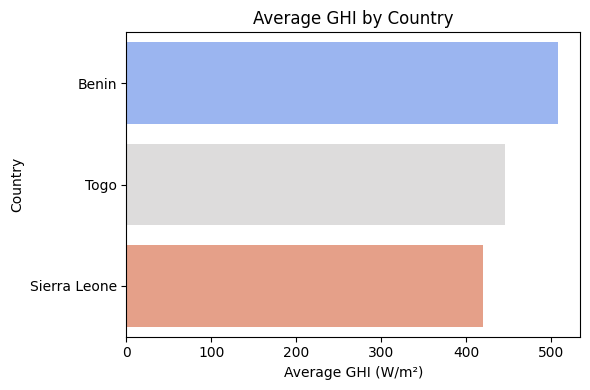

In [9]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Create a DataFrame for plotting
avg_ghi_df = avg_ghi.reset_index()

plt.figure(figsize=(6, 4))

sns.barplot(x='GHI', y='Country', hue='Country', data=avg_ghi_df, palette='coolwarm', legend=False)

plt.title('Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

